PENGUMPULAN DATA

Sumber Data: https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge

PREPEMPROSESAN DATA, ANALISIS DATA EKSPLORATORI, DAN VISUALISASI DATA

In [94]:
# Import numpy, pandas, matplotlib, seaborn, dan scatter_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Import modul scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Import modul scipy.stats
from scipy import stats

# Import joblib untuk menyimpan model
import joblib

# Mengabaikan pesan peringatan
import warnings
warnings.filterwarnings('ignore')

In [95]:
# Import library pandas dan menggunakan fungsi read_csv untuk membaca file CSV
df = pd.read_csv('car_price_prediction.csv')

# Menampilkan 5 baris pertama dari DataFrame
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [96]:
# Menampilkan informasi mengenai DataFrame, termasuk tipe data dan jumlah nilai non-null pada setiap kolom
df.info()

# Menentukan kolom-kolom yang akan di-describe
desc = ['Price', 'Levy', 'Mileage', 'Prod. year', 'Cylinders', 'Airbags']

# Melakukan describe pada kolom-kolom yang telah ditentukan
df[desc].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,1.855593e+04,2010.912824,4.582991,6.582627
std,1.905813e+05,5.668673,1.199933,4.320168
min,1.000000e+00,1939.000000,1.000000,0.000000
25%,5.331000e+03,2009.000000,4.000000,4.000000
50%,1.317200e+04,2012.000000,4.000000,6.000000
75%,2.207500e+04,2015.000000,4.000000,12.000000
max,2.630750e+07,2020.000000,16.000000,16.000000


In [97]:
# Menampilkan nama kolom pada DataFrame dan nilai unik dari setiap kolom
for col in df.columns:
    print(col)
    print(df[f'{col}'].unique())
    print('*'*75)
    
# Menampilkan baris pada DataFrame yang memiliki nilai '-' pada kolom 'Levy'
df[df['Levy'] == '-']

# Mengganti nilai '-' dengan null (NaN) pada kolom 'Levy'
df['Levy'].replace({'-': np.nan}, inplace=True)

# Mengubah tipe data kolom 'Levy' menjadi float64
df['Levy'] = df['Levy'].astype('float64')

# Mengganti nilai 'Yes' dengan True dan nilai 'No' dengan False pada kolom 'Leather interior'
df['Leather interior'].replace({'Yes': True, 'No': False}, inplace=True)

# Mengubah semua karakter pada kolom 'Engine volume' menjadi lowercase
df['Engine volume'] = df['Engine volume'].str.lower()

# Mencari baris yang mengandung kata 'turbo' pada kolom 'Engine volume' dan menetapkan hasilnya pada kolom baru 'Turbo'
df['Turbo'] = df['Engine volume'].str.contains('turbo')

# Mengambil potongan (slice) 3 karakter pertama pada kolom 'Engine volume' dan mengubah tipe datanya menjadi float64
df['Engine volume'] = df['Engine volume'].str.slice(0,3)
df['Engine volume'] = df['Engine volume'].astype('float64')

# Menghapus karakter 'km' pada kolom 'Mileage' dan mengubah tipe datanya menjadi int64
df['Mileage'] = df['Mileage'].str.strip('km')
df['Mileage'] = df['Mileage'].astype('int64')

# Mengganti nilai '04-May' dengan 4, '02-Mar' dengan 2, dan '>5' dengan 5 pada kolom 'Doors'
df['Doors'].replace({'04-May': 4, '02-Mar': 2, '>5': 5}, inplace=True)

# Menghapus kolom 'ID' dari DataFrame dan menyimpan hasilnya pada variabel 'cars'
cars = df.drop('ID', axis=1)

# Menampilkan 5 baris pertama dari DataFrame 'cars'
cars.head()

ID
[45654403 44731507 45774419 ... 45804997 45793526 45813273]
***************************************************************************
Price
[13328 16621  8467 ... 56814 63886 22075]
***************************************************************************
Levy
['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798'

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,True,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,False
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,False,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,False
2,8467,NaN,HONDA,FIT,2006,Hatchback,False,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,False
3,3607,862.0,FORD,Escape,2011,Jeep,True,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,False
4,11726,446.0,HONDA,FIT,2014,Hatchback,True,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,False


In [98]:
# Menampilkan baris dengan harga tertinggi
display(cars[cars.Price == cars.Price.max()])

# Menampilkan baris dengan harga kurang dari 1000
display(cars[cars.Price < 1000])

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
16983,26307500,NaN,OPEL,Combo,1999,Goods wagon,False,Diesel,1.7,99999,4.0,Manual,Front,2,Left wheel,Blue,0,False


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
7,549,751.0,HYUNDAI,Sonata,2013,Sedan,True,Petrol,2.4,216118,4.0,Automatic,Front,4,Left wheel,Grey,12,False
10,941,1053.0,MERCEDES-BENZ,E 350,2014,Sedan,True,Diesel,3.5,184467,6.0,Automatic,Rear,4,Left wheel,White,12,False
15,549,1079.0,TOYOTA,CHR,2018,Jeep,True,Petrol,2.0,74146,4.0,Automatic,Front,4,Left wheel,White,12,False
18,549,2386.0,HYUNDAI,Sonata,2006,Sedan,True,Petrol,3.3,295059,6.0,Automatic,Rear,4,Left wheel,Blue,12,False
19,941,1850.0,LEXUS,RX 400,2008,Jeep,True,Hybrid,3.5,364523,6.0,Automatic,4x4,4,Left wheel,Black,12,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19218,30,NaN,NISSAN,Note,2006,Hatchback,False,Petrol,1.3,0,4.0,Automatic,Front,4,Right-hand drive,Green,9,False
19228,706,1850.0,MERCEDES-BENZ,E 350,2008,Sedan,True,Diesel,3.5,122874,6.0,Automatic,Rear,4,Left wheel,Black,12,False
19229,50,NaN,TOYOTA,Prius,2008,Hatchback,False,Hybrid,1.5,150000,4.0,Automatic,Front,4,Left wheel,Silver,6,False
19230,470,645.0,TOYOTA,Prius,2011,Hatchback,True,Hybrid,1.8,307325,4.0,Automatic,Front,4,Left wheel,Silver,12,False


In [99]:
# Menampilkan baris dengan jarak tempuh terjauh
display(cars[cars.Mileage == cars.Mileage.max()])

# Menampilkan baris dengan jarak tempuh kurang dari 1000
display(cars[cars.Mileage < 1000])

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
2278,6899,NaN,VOLKSWAGEN,Golf,1999,Sedan,False,Petrol,1.6,2147483647,4.0,Manual,Front,4,Left wheel,Black,4,False
6157,5959,NaN,MERCEDES-BENZ,C 180,1995,Sedan,False,CNG,1.8,2147483647,4.0,Manual,Rear,4,Left wheel,Blue,5,False
11901,10036,NaN,SUBARU,Forester,2005,Jeep,False,Petrol,2.0,2147483647,4.0,Tiptronic,4x4,4,Right-hand drive,White,12,False
12734,2200,NaN,UAZ,31514,1968,Jeep,True,CNG,2.4,2147483647,4.0,Manual,4x4,4,Left wheel,Black,10,False
15347,3,NaN,BMW,525,1995,Sedan,False,Petrol,2.8,2147483647,6.0,Manual,Rear,4,Left wheel,Black,3,False
15393,15681,NaN,TOYOTA,Prius,2008,Sedan,False,Petrol,2.0,2147483647,4.0,Automatic,Front,4,Left wheel,Blue,0,False
19167,18817,1995.0,FORD,Transit,2003,Microbus,False,Diesel,2.4,2147483647,4.0,Manual,Front,2,Left wheel,White,2,True


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
11,8781,NaN,FORD,Transit,1999,Microbus,False,CNG,4.0,0,8.0,Manual,Rear,2,Left wheel,Blue,0,False
24,4704,NaN,OPEL,Vectra,1995,Sedan,False,Petrol,1.8,0,4.0,Automatic,Front,4,Left wheel,Green,4,False
26,549,2455.0,LEXUS,GX 470,2008,Jeep,True,Petrol,4.7,0,8.0,Automatic,4x4,4,Left wheel,White,0,False
83,8154,NaN,HONDA,Cr-v,1998,Jeep,False,Petrol,2.0,0,4.0,Automatic,4x4,4,Right-hand drive,White,2,False
97,4234,NaN,HONDA,Civic,1997,Hatchback,True,Petrol,1.4,0,4.0,Manual,Front,2,Left wheel,Blue,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19064,2900,NaN,BMW,320,1994,Sedan,True,Petrol,2.0,0,6.0,Manual,Rear,4,Left wheel,Green,2,False
19088,2200,NaN,PEUGEOT,406,2001,Sedan,False,Petrol,2.0,0,4.0,Manual,Front,4,Left wheel,White,2,False
19103,30,NaN,NISSAN,Tiida,2006,Hatchback,False,Petrol,1.5,0,4.0,Automatic,Front,4,Right-hand drive,Black,4,False
19218,30,NaN,NISSAN,Note,2006,Hatchback,False,Petrol,1.3,0,4.0,Automatic,Front,4,Right-hand drive,Green,9,False


In [100]:
def detect_outliers(df, features, thold):
    outlier_indices = []
    
    for c in features:
        # Menghitung kuartil pertama
        Q1 = np.percentile(df[c], 25)
        # Menghitung kuartil ketiga
        Q3 = np.percentile(df[c], 75)
        # Menghitung rentang interkuartil (IQR)
        IQR = Q3 - Q1
        # Menghitung langkah outlier
        outlier_step = IQR * thold
        # Mendeteksi outlier dan indeksnya
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # Menyimpan indeks outlier
        outlier_indices.extend(outlier_list_col)
    
    return outlier_indices

In [101]:
# Daftar fitur yang akan digunakan untuk mendeteksi outlier
features = ['Price', 'Levy', 'Mileage']  

# Mendeteksi outlier dalam DataFrame 'cars' menggunakan fitur-fitur yang telah ditentukan dan threshold 1.5
outliers = detect_outliers(cars, features, 1.5) 

# Menghapus baris yang mengandung outlier dari DataFrame 'cars' dan menyimpan hasilnya dalam DataFrame 'deleted_df'
deleted_df = cars.drop(cars.loc[outliers].index, axis=0)  

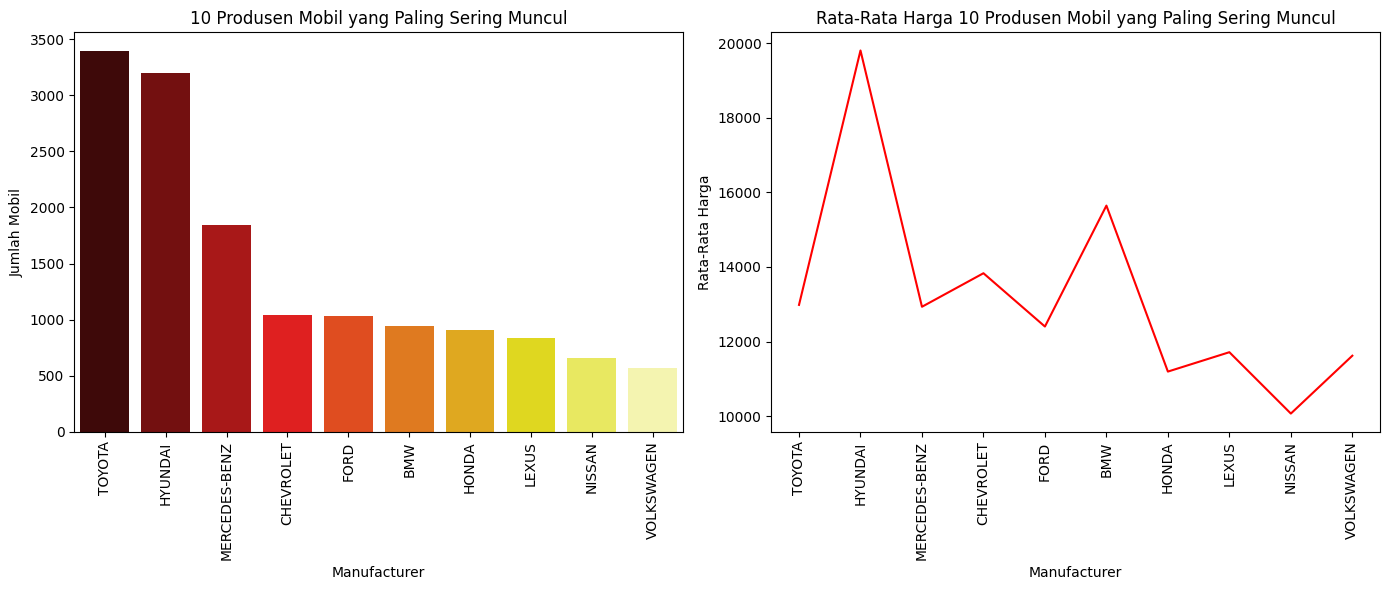

In [102]:
# Impor library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung 10 mobil paling sering muncul
top10_cars = deleted_df['Manufacturer'].value_counts().sort_values(ascending=False)[:10]

# Menghitung rata-rata harga untuk setiap mobil dalam top 10
top10_mean_prices = [deleted_df[deleted_df['Manufacturer'] == i]['Price'].mean() for i in list(top10_cars.index)]

# Membuat figure dengan dua subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot bar chart untuk produsen mobil yang paling sering muncul
sns.barplot(x=top10_cars.index, y=top10_cars.values, palette='hot', ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_ylabel('Jumlah Mobil')
ax1.set_title('10 Produsen Mobil yang Paling Sering Muncul')

# Plot line chart untuk rata-rata harga produsen mobil yang paling sering muncul
sns.lineplot(x=top10_cars.index, y=top10_mean_prices, color='r', ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90) 
ax2.set_ylabel('Rata-Rata Harga')
ax2.set_title("Rata-Rata Harga 10 Produsen Mobil yang Paling Sering Muncul")

# Mengatur layout dan menampilkan chart
plt.tight_layout()
plt.show()

In [103]:
# Mengelompokkan data berdasarkan kolom 'Doors' dan 'Drive wheels', kemudian menghitung jumlah nilai unik ('value_counts()')
deleted_df.groupby('Doors')['Drive wheels'].value_counts()

Doors  Drive wheels
2      Rear              335
       Front             285
       4x4               103
4      Front           11528
       4x4              3440
       Rear             1723
5      Front              54
       Rear               30
       4x4                29
Name: count, dtype: int64

In [104]:
# Menghitung jumlah kemunculan nilai unik pada setiap kombinasi nilai 'Doors' dan 'Drive wheels', kemudian mengubahnya menjadi array numpy
dd_val = np.array(deleted_df.groupby('Doors')['Drive wheels'].value_counts().values).reshape(3, 3)

# Menghitung jumlah total kemunculan nilai pada setiap baris
dd_sum = dd_val.sum(axis=1).reshape(3, 1)

# Menggandakan nilai jumlah total kemunculan untuk setiap kolom
dd_sum = np.c_[dd_sum, dd_sum, dd_sum].flatten()

# Menghitung persentase kemunculan nilai pada setiap kombinasi 'Doors' dan 'Drive wheels'
(deleted_df.groupby('Doors')['Drive wheels'].value_counts() / dd_sum) * 100

Doors  Drive wheels
2      Rear            46.334716
       Front           39.419087
       4x4             14.246196
4      Front           69.067162
       4x4             20.609910
       Rear            10.322929
5      Front           47.787611
       Rear            26.548673
       4x4             25.663717
Name: count, dtype: float64

In [105]:
# Mengelompokkan data berdasarkan nilai unik pada kolom 'Drive wheels', kemudian menghitung rata-rata harga untuk setiap grup
grouped_mean_price = deleted_df.groupby('Drive wheels')['Price'].mean()

# Mengurutkan hasil pengelompokkan berdasarkan nilai rata-rata harga secara menurun
grouped_mean_price.sort_values(ascending=False)

Drive wheels
Front    14700.483441
Rear     13662.755268
4x4      12958.593505
Name: Price, dtype: float64

In [106]:
# Mengelompokkan data berdasarkan nilai unik pada kolom 'Gear box type' dan menghitung nilai median harga untuk setiap grup
grouped_median_price = deleted_df.groupby('Gear box type')['Price'].median()

# Mengurutkan hasil pengelompokkan berdasarkan nilai median harga secara menurun
grouped_median_price_sorted = grouped_median_price.sort_values(ascending=False)

# Menampilkan hasil pengelompokkan yang telah diurutkan
grouped_median_price_sorted

Gear box type
Tiptronic    17876.0
Variator     13172.0
Automatic    11563.0
Manual        8781.0
Name: Price, dtype: float64

In [107]:
# Mengelompokkan data berdasarkan nilai unik pada kolom 'Color' dan menghitung nilai rata-rata harga untuk setiap grup
grouped_mean_price = deleted_df.groupby('Color')['Price'].mean()

# Mengurutkan hasil pengelompokkan berdasarkan nilai rata-rata harga secara menurun
grouped_mean_price_sorted = grouped_mean_price.sort_values(ascending=False)

# Menampilkan hasil pengelompokkan yang telah diurutkan
grouped_mean_price_sorted

Color
Yellow           16165.645833
Grey             15511.388683
White            14855.971142
Brown            14810.414201
Carnelian red    14742.733728
Orange           14695.240506
Beige            14418.140625
Black            14270.543848
Sky blue         13961.554622
Silver           13956.965266
Golden           13623.264286
Blue             12751.590000
Red              12338.672078
Green             9117.311475
Pink              8967.560000
Purple            8837.384615
Name: Price, dtype: float64

In [108]:
# Mengelompokkan data berdasarkan nilai unik pada kolom 'Turbo' dan menghitung nilai median harga untuk setiap grup
grouped_median_price = deleted_df.groupby('Turbo')['Price'].median()

# Mengurutkan hasil pengelompokkan berdasarkan nilai median harga secara menurun
grouped_median_price_sorted = grouped_median_price.sort_values(ascending=False)

# Menampilkan hasil pengelompokkan yang telah diurutkan
grouped_median_price_sorted

Turbo
True     18189.0
False    11917.0
Name: Price, dtype: float64

In [109]:
# Mengelompokkan data berdasarkan nilai unik pada kolom 'Wheel' dan menghitung nilai median harga untuk setiap grup
grouped_median_price = deleted_df.groupby('Wheel')['Price'].median()

# Mengurutkan hasil pengelompokkan berdasarkan nilai median harga secara menurun
grouped_median_price_sorted = grouped_median_price.sort_values(ascending=False)

# Menampilkan hasil pengelompokkan yang telah diurutkan
grouped_median_price_sorted

Wheel
Left wheel          13485.0
Right-hand drive     8467.0
Name: Price, dtype: float64

In [110]:
# Mengelompokkan data berdasarkan nilai unik pada kolom 'Fuel type' dan menghitung nilai median harga untuk setiap grup
grouped_median_price = deleted_df.groupby('Fuel type')['Price'].median()

# Mengurutkan hasil pengelompokkan berdasarkan nilai median harga secara menurun
grouped_median_price_sorted = grouped_median_price.sort_values(ascending=False)

# Menampilkan hasil pengelompokkan yang telah diurutkan
grouped_median_price_sorted

Fuel type
Plug-in Hybrid    22580.0
Hydrogen          20385.0
Diesel            18817.0
LPG               13485.0
Petrol            11917.0
Hybrid            10036.0
CNG                7527.0
Name: Price, dtype: float64

In [111]:
# Menghitung jumlah kemunculan setiap nilai unik dalam kolom 'Fuel type'
fuel_type_counts = deleted_df['Fuel type'].value_counts()

# Menampilkan jumlah kemunculan setiap nilai unik dalam kolom 'Fuel type'
fuel_type_counts

Fuel type
Petrol            9362
Diesel            3596
Hybrid            3383
LPG                632
CNG                469
Plug-in Hybrid      84
Hydrogen             1
Name: count, dtype: int64

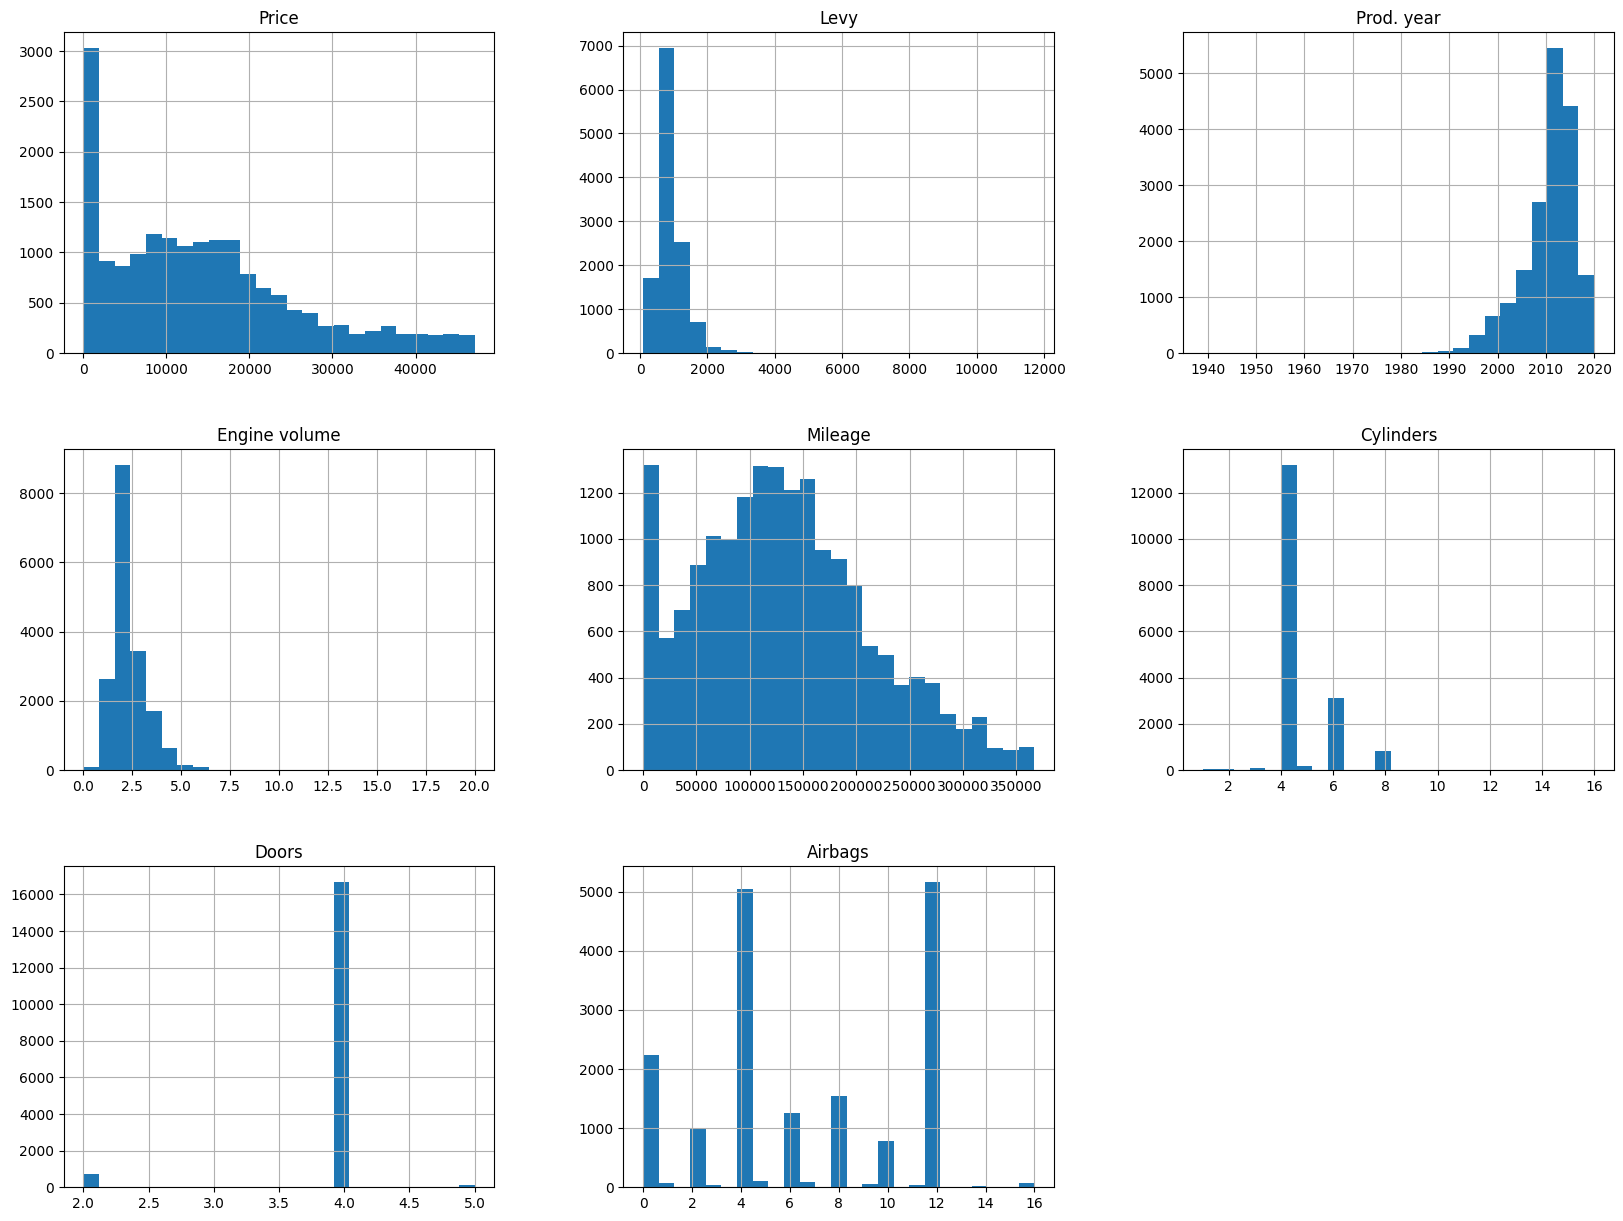

In [112]:
# Mengatur agar visualisasi plot histogram ditampilkan di dalam notebook
%matplotlib inline

# Menampilkan histogram untuk setiap kolom dalam DataFrame deleted_df
deleted_df.hist(bins=25, figsize=(20,15))
plt.show()

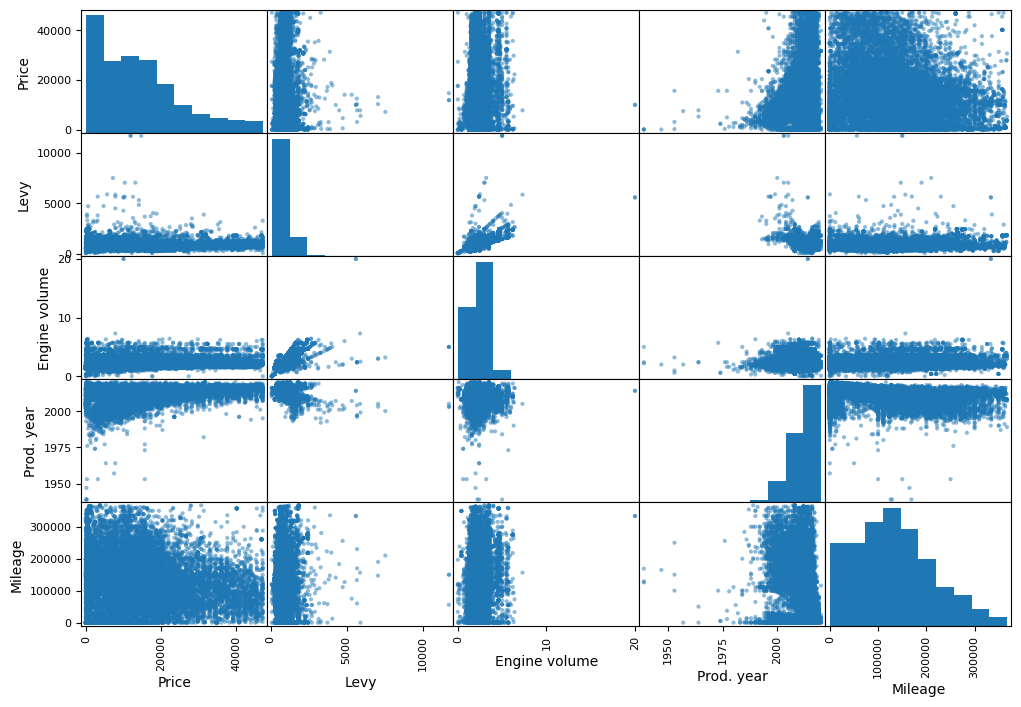

In [113]:
attributes = ['Price', 'Levy', 'Engine volume', 'Prod. year', 'Mileage']

# Menampilkan scatter matrix untuk atribut-atribut yang telah ditentukan
scatter_matrix(deleted_df[attributes], figsize=(12, 8))

# Menampilkan plot
plt.show()

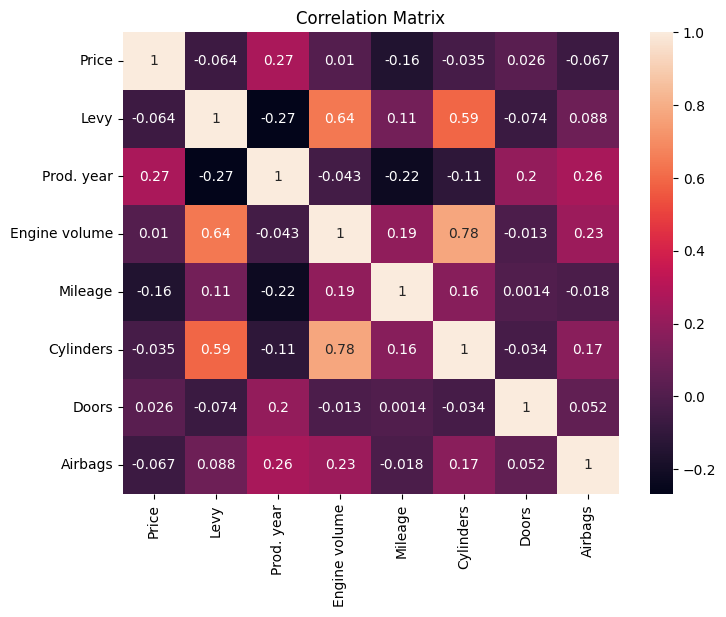

In [114]:
# Mengambil kolom-kolom numerik dari DataFrame
numeric_cols = deleted_df.select_dtypes(include='number')

# Membuat figure dengan ukuran 8x6
plt.figure(figsize=(8, 6))

# Membuat heatmap dengan menggunakan matriks korelasi dari kolom-kolom numerik
sns.heatmap(numeric_cols.corr(), annot=True, cbar=True)

# Menambahkan judul pada plot
plt.title('Correlation Matrix')

# Menampilkan plot
plt.show()

In [115]:
# Atribut numerik
num_attribs = ['Levy', 'Prod. year', 'Engine volume', 'Doors', 'Mileage', 'Cylinders', 'Airbags']

# Atribut kategorikal
cat_attribs = ['Manufacturer', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color', 'Turbo']

In [116]:
# Atribut numerik
num_cars = deleted_df[num_attribs]

# Atribut target (variabel dependen)
y = deleted_df['Price']

# Atribut kategorikal
cat_cars = deleted_df[cat_attribs]

In [117]:
# Import library yang diperlukan
from sklearn.impute import SimpleImputer

# Membuat objek Imputer dengan strategi median
imputer = SimpleImputer(strategy='median')

# Melakukan fitting Imputer ke data numerik
imputer.fit(num_cars)

# Menampilkan nilai median dari setiap kolom numerik
print(imputer.statistics_)

# Mengganti nilai yang hilang dengan nilai median menggunakan transform
num_cars = imputer.transform(num_cars)

[7.79000e+02 2.01200e+03 2.00000e+00 4.00000e+00 1.26265e+05 4.00000e+00
 6.00000e+00]


In [118]:
# Membuat objek scaler dengan menggunakan StandardScaler
scaler = StandardScaler()

# Melakukan fitting dan transformasi pada data numerik dengan scaler
num_cars = scaler.fit_transform(num_cars)

In [119]:
# Merujuk pada sebuah variabel yang digunakan untuk menyimpan data mengenai jumlah mobil
num_cars

array([[ 1.37160845, -0.1217927 ,  1.41203665, ...,  0.65905288,
         1.24261819,  1.24708939],
       [ 0.40211876,  0.05745498,  0.83329684, ...,  0.73275   ,
         1.24261819,  0.32314571],
       [-0.20603881, -0.8387834 , -1.13441853, ...,  0.83109479,
        -0.47689618, -1.06276982],
       ...,
       [-0.06099705, -0.1217927 , -0.32418279, ..., -0.19703846,
        -0.47689618, -0.60079798],
       [ 1.0891587 , -0.65953572, -0.32418279, ..., -0.99740519,
        -0.47689618, -0.60079798],
       [-0.27219821,  0.23670266,  0.13880906, ...,  0.67033795,
        -0.47689618,  1.24708939]])

In [120]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Menggunakan Imputer dengan strategi median untuk mengganti nilai yang hilang
    ('std_scaler', StandardScaler())  # Melakukan penskalaan data menggunakan StandardScaler
])

In [121]:
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),  # Menggunakan num_pipeline untuk fitur numerik (num_attribs)
    ('cat', OneHotEncoder(), cat_attribs)  # Menggunakan OneHotEncoder untuk fitur kategorikal (cat_attribs)
])
cars_prepared = full_pipeline.fit_transform(deleted_df)  # Melakukan preprocessing pada deleted_df menggunakan full_pipeline

PEMODELAN DATA & VISUALISASI DATA

In [149]:
# Mengimpor library yang diperlukan
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(cars_prepared, y, test_size=0.2, random_state=123)

# Membuat objek model regresi linear
lin_reg = LinearRegression()

# Melatih model regresi linear menggunakan data latih
lin_reg.fit(X_train, y_train)

# Melakukan prediksi menggunakan model regresi linear pada data latih (X_train)
train_predictions = lin_reg.predict(X_train)

# Menghitung mean absolute error (MAE) antara nilai sebenarnya (y_train) dan prediksi (train_predictions)
train_mae = mean_absolute_error(y_train, train_predictions)

# Menampilkan nilai MAE untuk data latih
print("Training MAE: ", train_mae)

# Melakukan prediksi menggunakan model regresi linear pada data uji (X_test)
test_predictions = lin_reg.predict(X_test)

# Menghitung mean absolute error (MAE) antara nilai sebenarnya (y_test) dan prediksi (test_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Menampilkan nilai MAE untuk data uji
print("Test MAE: ", test_mae)

Training MAE:  7115.730466745992
Test MAE:  7132.218462452013


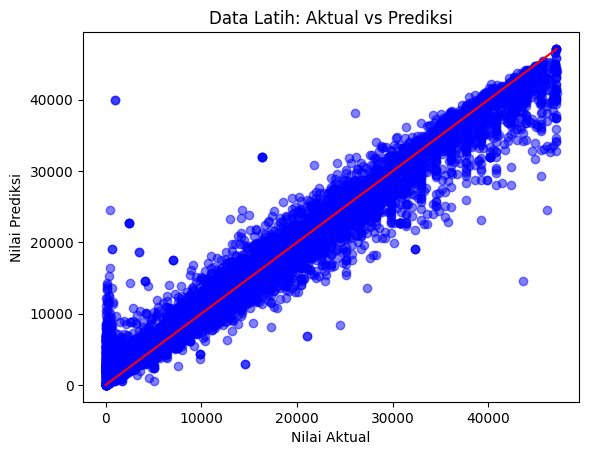

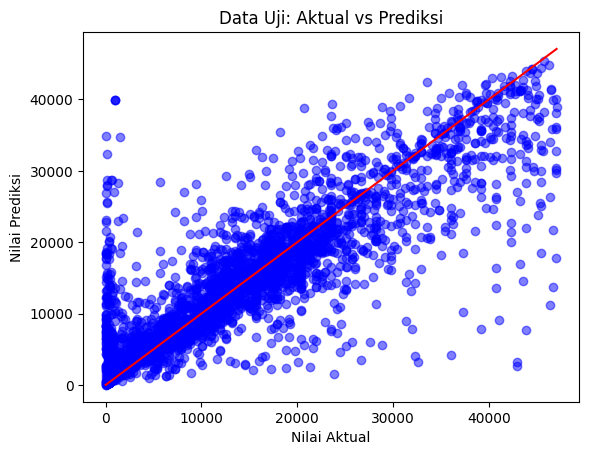

In [157]:
# Modul untuk membuat plot grafik
import matplotlib.pyplot as plt  

# Scatter plot untuk data latih
plt.scatter(y_train, train_predictions, color='blue', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')  # Menambahkan garis diagonal sebagai referensi
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Data Latih: Aktual vs Prediksi')
plt.show()

# Scatter plot untuk data uji
plt.scatter(y_test, test_predictions, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Menambahkan garis diagonal sebagai referensi
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Data Uji: Aktual vs Prediksi')
plt.show()

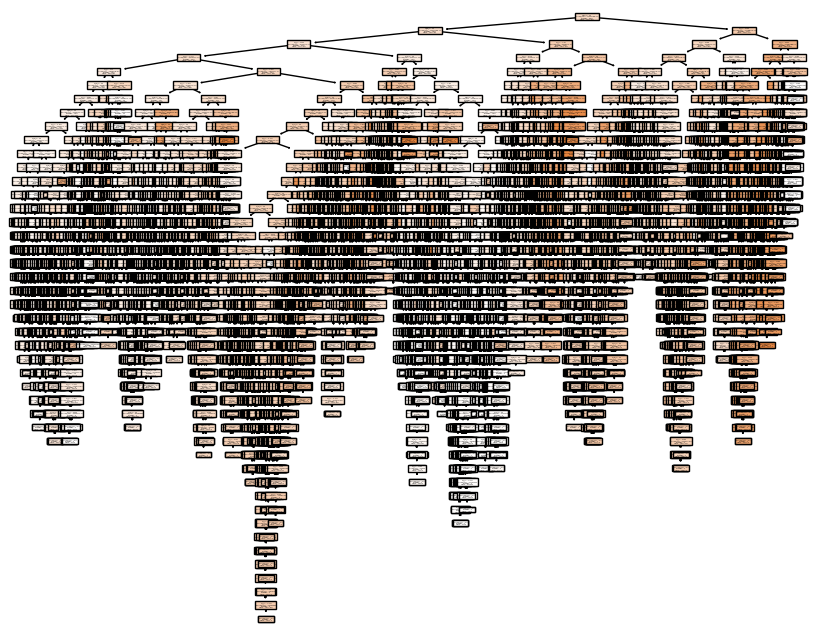

Training MAE:  1284.3851590752681
Test MAE:  3438.8155093588625


In [156]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(cars_prepared, y, test_size=0.2, random_state=123)

# Membuat objek model RandomForestRegressor
rf_reg = RandomForestRegressor()

# Melatih model RandomForestRegressor menggunakan data latih
rf_reg.fit(X_train, y_train)

# Visualize a decision tree from the Random Forest
tree_index = 0  # Select the index of the tree to visualize (e.g., 0 for the first tree)
plt.figure(figsize=(10, 8))
plot_tree(rf_reg.estimators_[tree_index], feature_names=None, filled=True)
plt.show()

# Melakukan prediksi menggunakan model RandomForestRegressor pada data latih (X_train)
train_predictions = rf_reg.predict(X_train)

# Menghitung mean absolute error (MAE) antara nilai sebenarnya (y_train) dan prediksi (train_predictions)
train_mae = mean_absolute_error(y_train, train_predictions)

# Menampilkan nilai MAE untuk data latih
print("Training MAE: ", train_mae)

# Melakukan prediksi menggunakan model RandomForestRegressor pada data uji (X_test)
test_predictions = rf_reg.predict(X_test)

# Menghitung mean absolute error (MAE) antara nilai sebenarnya (y_test) dan prediksi (test_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Menampilkan nilai MAE untuk data uji
print("Test MAE: ", test_mae)
